## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [197]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

'wget' is not recognized as an internal or external command,
operable program or batch file.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [198]:
import numpy as np
import pandas as pd
from numpy import random as npr

filepath = "C:/Users/leonm/data/"
filename = filepath+"data_000637.txt"

data = pd.read_csv(filename)

print(len(data))

N = npr.randint(10001,len(data)+1)
print(N)

dataN = data[:N]
dataN

1310720
420304


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
420299,1,0,59,3869204400,1432,12
420300,1,0,62,3869204400,1440,22
420301,1,0,60,3869204400,1440,27
420302,1,1,1,3869204400,1774,17


2\. Find out the number of BX in a ORBIT (the value 'x').

In [199]:
x = data.max()[4] + 1
print(x)

3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [200]:
# Assuming an approximately linear relationship between number of measurements taken
# and time passed, we can calculate total time from the fraction 
# t_fraction : t_total = N : 1310720

i = dataN.iloc[0]
f = dataN.iloc[-1]

delta_ORBIT = f[3] - i[3]
delta_BX = f[4] - i[4]
delta_TDC = f[5] - i[5]

# time passed in nanoseconds

t_fraction = delta_ORBIT*x*25 + delta_BX*25 + delta_TDC*25/30
print("Seconds passed after", N, "measurements:", t_fraction/(10**9))
print("Total time elapsed (estimate based on fraction): ", t_fraction*len(data)/N/(10**9), "s")

i = data.iloc[0]
f = data.iloc[-1]

delta_ORBIT = f[3] - i[3]
delta_BX = f[4] - i[4]
delta_TDC = f[5] - i[5]

t_total = delta_ORBIT*x*25 + delta_BX*25 + delta_TDC*25/30
print("Total time elapsed: ", t_total/(10**9), "s")


Seconds passed after 420304 measurements: 0.3771453025
Total time elapsed (estimate based on fraction):  1.1761293989417183 s
Total time elapsed:  0.9804160933333333 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [201]:
data["time_elapsed (ns)"] = pd.Series((data["ORBIT_CNT"]*x*25 + data["BX_COUNTER"]*25 + data["TDC_MEAS"]*25/30), index=dataN.index)

dataN.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [202]:
data.loc[:,"HEAD"] = npr.randint(0,2,len(data))
data.head(40)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_elapsed (ns)
0,0,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
8,0,0,62,3869200167,2774,21,3.447457e+14
9,0,0,60,3869200167,2788,7,3.447457e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [203]:
newdata = data[data["HEAD"] == 1]
newdata.head(40)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_elapsed (ns)
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
10,1,1,7,3869200167,2785,4,3.447457e+14
12,1,1,6,3869200167,2792,18,3.447457e+14
15,1,1,139,3869200167,2797,0,3.447457e+14
17,1,0,63,3869200167,2790,10,3.447457e+14
21,1,0,57,3869200167,2789,10,3.447457e+14
23,1,0,38,3869200167,2799,15,3.447457e+14
27,1,0,59,3869200167,3081,21,3.447457e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

922852
387868
139
1


array([[<AxesSubplot:title={'center':'TDC_CHANNEL'}>]], dtype=object)

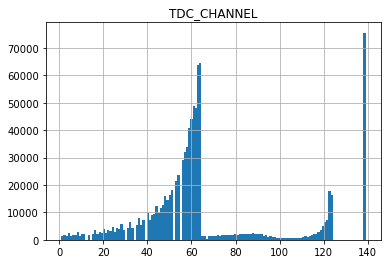

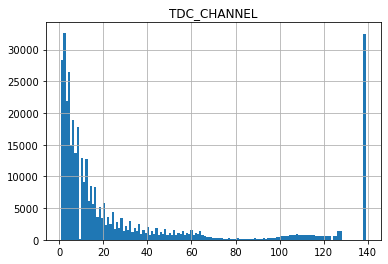

In [204]:
dataN0 = data[data["FPGA"] == 0]
print(len(dataN0))

dataN1 = data[data["FPGA"] == 1]
print(len(dataN1))

print(data["TDC_CHANNEL"].max())
print(data["TDC_CHANNEL"].min())

dataN0.hist("TDC_CHANNEL", bins=139)
dataN1.hist("TDC_CHANNEL", bins=139)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [205]:
datagroup = data.groupby(["FPGA","TDC_CHANNEL"])["TDC_CHANNEL"].count().sort_values(ascending=False)
print(datagroup.head(15))

FPGA  TDC_CHANNEL
0     139            75617
      64             64581
      63             63724
      61             48699
      62             48275
      60             44263
      59             40721
      58             33707
1     2              32669
      139            32442
0     57             32189
      56             29164
1     1              28438
      4              26403
0     54             23633
Name: TDC_CHANNEL, dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [206]:
data["ORBIT_CNT"].value_counts()

3869208772    351
3869207118    337
3869209661    324
3869206967    322
3869206506    305
             ... 
3869204462      3
3869203571      2
3869205800      2
3869206180      1
3869204142      1
Name: ORBIT_CNT, Length: 11001, dtype: int64

In [207]:
group = dataN.groupby("TDC_CHANNEL")
group139 = group.get_group(139)
#print(group139)

group139["ORBIT_CNT"].value_counts()

3869201057    20
3869201221    19
3869201325    18
3869203820    18
3869203902    17
              ..
3869200471     1
3869202701     1
3869203633     1
3869203666     1
3869202919     1
Name: ORBIT_CNT, Length: 4220, dtype: int64